In [52]:
import pandas as pd
import numpy as np
from pydataset import data

In [53]:
data = data('iris')
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
X = data.iloc[:,0:4]
y = data.iloc[:,4]

In [38]:
def PCA(X,n):
    X_mean = X-np.mean(X,axis=0)
    cov_mat = np.cov(X_mean,rowvar=False)
    eigen_values,eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:n]
    X_scaled = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
    return X_scaled

In [39]:
X_scaled = PCA(X,2)
print(X_scaled)

[[ 2.26470281  0.4800266 ]
 [ 2.08096115 -0.67413356]
 [ 2.36422905 -0.34190802]
 [ 2.29938422 -0.59739451]
 [ 2.38984217  0.64683538]
 [ 2.07563095  1.48917752]
 [ 2.44402884  0.0476442 ]
 [ 2.23284716  0.22314807]
 [ 2.33464048 -1.11532768]
 [ 2.18432817 -0.46901356]
 [ 2.1663101   1.04369065]
 [ 2.32613087  0.13307834]
 [ 2.2184509  -0.72867617]
 [ 2.6331007  -0.96150673]
 [ 2.1987406   1.86005711]
 [ 2.26221453  2.68628449]
 [ 2.2075877   1.48360936]
 [ 2.19034951  0.48883832]
 [ 1.898572    1.40501879]
 [ 2.34336905  1.12784938]
 [ 1.914323    0.40885571]
 [ 2.20701284  0.92412143]
 [ 2.7743447   0.45834367]
 [ 1.81866953  0.08555853]
 [ 2.22716331  0.13725446]
 [ 1.95184633 -0.62561859]
 [ 2.05115137  0.24216355]
 [ 2.16857717  0.52714953]
 [ 2.13956345  0.31321781]
 [ 2.26526149 -0.3377319 ]
 [ 2.14012214 -0.50454069]
 [ 1.83159477  0.42369507]
 [ 2.61494794  1.79357586]
 [ 2.44617739  2.15072788]
 [ 2.10997488 -0.46020184]
 [ 2.2078089  -0.2061074 ]
 [ 2.04514621  0.66155811]
 

In [50]:
df = pd.DataFrame(X_scaled,columns = ['PC1','PC2'])
df.index += 1
final_df = pd.concat([df,y],axis=1)
print(y.head(5))
final_df.head(5)

1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: Species, dtype: object


,PC1,PC2,Species
1,2.264703,0.480027,setosa
2,2.080961,-0.674134,setosa
3,2.364229,-0.341908,setosa
4,2.299384,-0.597395,setosa
5,2.389842,0.646835,setosa


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

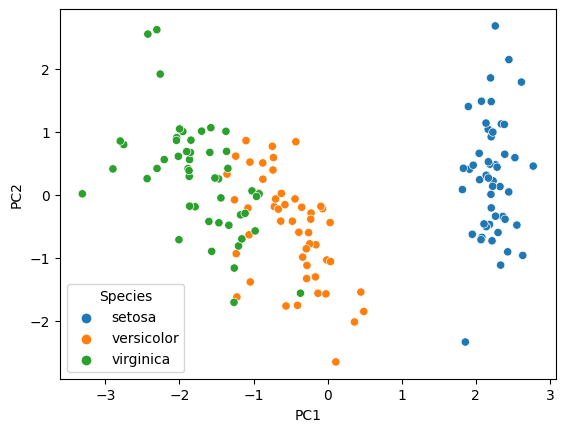

In [51]:
import seaborn as sb
sb.scatterplot(data = final_df,x = 'PC1',y='PC2',hue = y)

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [25]:
print(pca.explained_variance_)
print(pca.components_)

[2.93808505 0.9201649 ]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


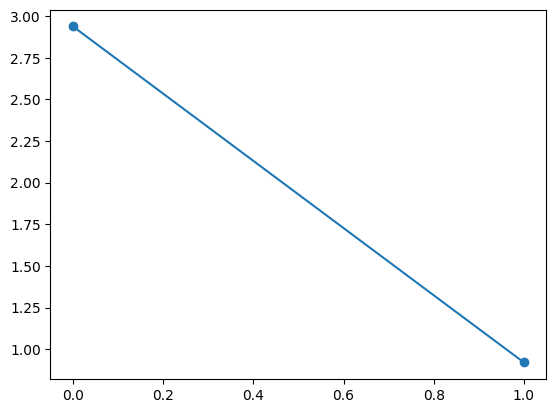

In [27]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_, marker='o')
plt.show()